In [ ]:
!pip install streamlit
!pip install streamlit_lottie


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 18.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st


import pandas as pd
import plotly.graph_objects as go
import altair as alt
import plotly.express as px
from streamlit_lottie import st_lottie
import requests

In [ ]:
import pandas as pd

# Read the CSV file into a pandas.DataFrame object
df = pd.read_csv("solar_wind.csv")

# Print the DataFrame
print(df)


         period          timedelta  bx_gse  by_gse  bz_gse  theta_gse  \
0       train_a    0 days 00:00:00   -5.55    3.00    1.25      11.09   
1       train_a    0 days 00:01:00   -5.58    3.16    1.17      10.10   
2       train_a    0 days 00:02:00   -5.15    3.66    0.85       7.87   
3       train_a    0 days 00:03:00   -5.20    3.68    0.68       6.17   
4       train_a    0 days 00:04:00   -5.12    3.68    0.49       4.62   
...         ...                ...     ...     ...     ...        ...   
250620  train_a  174 days 01:00:00   -3.37    4.99    2.26      20.56   
250621  train_a  174 days 01:01:00   -3.54    4.96    2.01      18.22   
250622  train_a  174 days 01:02:00   -3.61    4.97    1.87      16.90   
250623  train_a  174 days 01:03:00   -3.71    4.94    1.99      17.82   
250624  train_a  174 days 01:04:00   -3.80    4.82    2.17      19.43   

        phi_gse  bx_gsm  by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
0        153.37   -5.55    3.00    1.25      

In [ ]:
 import pandas as pd

# Read the CSV file into a pandas.DataFrame object
df = pd.read_csv("solar_wind.csv")

# Access the name column
name_column = df["bx_gse"]

# Pass the column to the x= argument of the go.Scatter() function
fig = go.Figure(data=[go.Scatter(x=name_column, y=[1, 2, 3])])


In [ ]:
def Graph_of_Discharge_Ratio():
    fig = go.Figure()

    # Read the CSV file into a pandas.DataFrame object
    df = pd.read_csv("solar_wind.csv")

    # Access the bx_gse column
    bx_gse_column = df["bx_gse"]

    # Pass the column to the x= argument of the go.Scatter() function
    fig.add_trace(go.Scatter(x=bx_gse_column, y=df['timedelta'], name="States"))
    fig.add_trace(go.Scatter(x=df['by_gse'], y=df['timedelta'], name="Discharge Ratio"))

    fig.update_layout(title={ 'font': { 'size': 25}})
    fig.layout.update(
        title_text='Discharge Ratio by State', xaxis_rangeslider_visible=True, xaxis_rangeslider_thickness=0.05)
    fig.update_layout(height=500, width=1000)
    fig.update_traces(line=dict(color='red'))

    st.plotly_chart(fig, use_container_width=False, use_container_height=False)
Graph_of_Discharge_Ratio()


2023-10-08 06:29:45.752 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


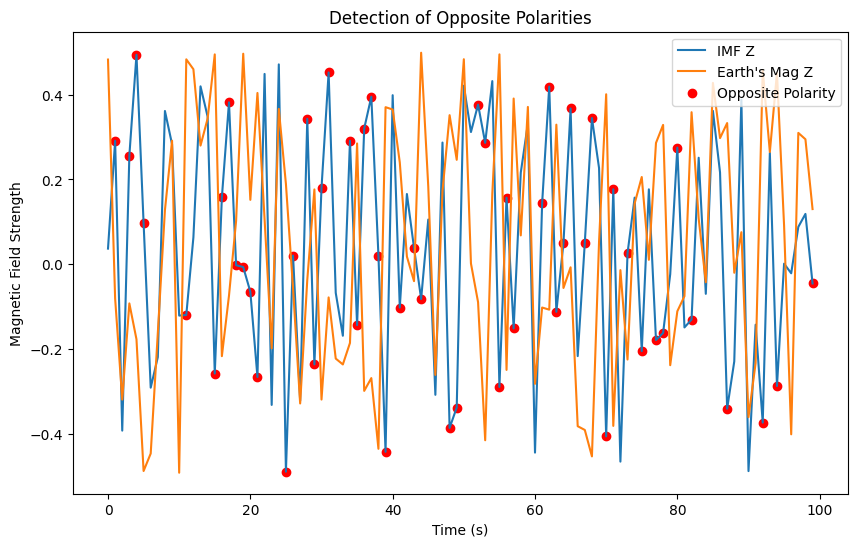

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
timestamps = np.arange(0, 100, 1)  # Time in seconds
IMF_Z = np.random.rand(len(timestamps)) - 0.5  # Random IMF Z component (-0.5 to 0.5)
Earth_Mag_Z = np.random.rand(len(timestamps)) - 0.5  # Random Earth's magnetic field Z component (-0.5 to 0.5)

# Detect intervals with opposite polarities
opposite_polarity_intervals = np.where(np.sign(IMF_Z) != np.sign(Earth_Mag_Z))

# Plot the data and highlight intervals with opposite polarities
plt.figure(figsize=(10, 6))
plt.plot(timestamps, IMF_Z, label='IMF Z')
plt.plot(timestamps, Earth_Mag_Z, label="Earth's Mag Z")
plt.scatter(timestamps[opposite_polarity_intervals], IMF_Z[opposite_polarity_intervals], color='red', label='Opposite Polarity')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field Strength')
plt.legend()
plt.title('Detection of Opposite Polarities')
plt.show()

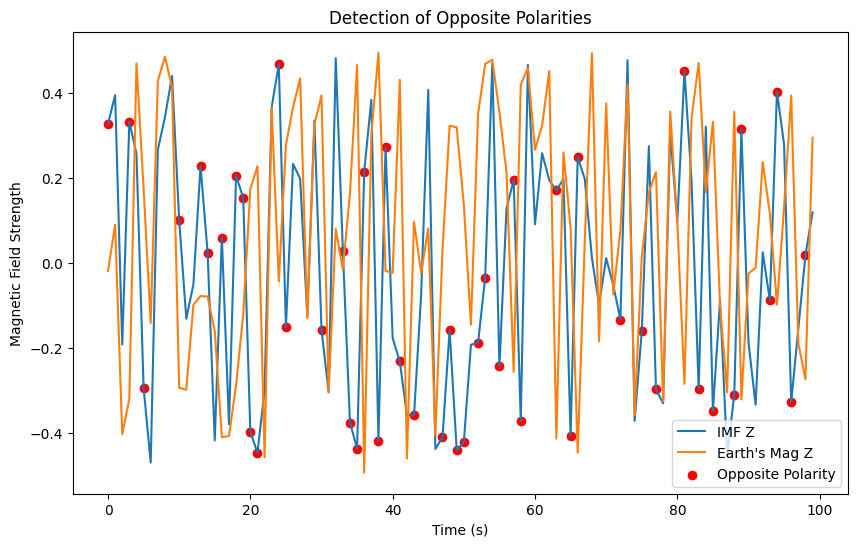

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
timestamps = np.arange(0, 100, 1)  # Time in seconds
IMF_Z = np.random.rand(len(timestamps)) - 0.5  # Random IMF Z component (-0.5 to 0.5)
Earth_Mag_Z = np.random.rand(len(timestamps)) - 0.5  # Random Earth's magnetic field Z component (-0.5 to 0.5)

# Detect intervals with opposite polarities
opposite_polarity_intervals = np.where(np.sign(IMF_Z) != np.sign(Earth_Mag_Z))

# Plot the data and highlight intervals with opposite polarities
plt.figure(figsize=(10, 6))
plt.plot(timestamps, IMF_Z, label='IMF Z')
plt.plot(timestamps, Earth_Mag_Z, label="Earth's Mag Z")
plt.scatter(timestamps[opposite_polarity_intervals], IMF_Z[opposite_polarity_intervals], color='red', label='Opposite Polarity')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field Strength')
plt.legend()
plt.title('Detection of Opposite Polarities')
plt.show()

In [2]:
import pandas as pd

# Load data from a CSV file (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('solar_wind.csv')

# Extract the columns for IMF and Earth's magnetic field components
X_IMF = data['bx_gsm']
Y_IMF = data['by_gsm']
Z_IMF = data['bz_gsm']

X_Earth = data['bx_gse']
Y_Earth = data['by_gse']
Z_Earth = data['bz_gse']

# Initialize counter for magnetic reconnection events
magnetic_reconnection_count = 0

# Time tolerance in seconds (can be adjusted based on your data)
time_tolerance = 1

# Loop through data points to find instances of opposite polarities in the Z component
num_data_points = len(data)

for i in range(num_data_points):

    # Check for opposite polarities in Z component
    if Z_IMF[i] * Z_Earth[i] < 0:

        # Check if the condition persists within the time_tolerance
        if i + time_tolerance < num_data_points and Z_IMF[i + time_tolerance] * Z_Earth[i + time_tolerance] < 0:

            # You could add further checks here for other conditions, involving X, Y components
            # Example: Check if X_IMF and X_Earth align in some specific way when Z components are opposite

            # Increase counter for magnetic reconnection events
            magnetic_reconnection_count += 1

# Calculate frequency of potential magnetic reconnection events
frequency = magnetic_reconnection_count / num_data_points

print(f"Potential magnetic reconnection events occurred with a frequency of {frequency}")


In [ ]:
import random
import numpy as np

# Generate synthetic data (replace this with actual data)
num_data_points = 1000
X_IMF = np.random.uniform(-10, 10, num_data_points)
Y_IMF = np.random.uniform(-10, 10, num_data_points)
Z_IMF = np.random.uniform(-10, 10, num_data_points)

X_Earth = np.random.uniform(-10, 10, num_data_points)
Y_Earth = np.random.uniform(-10, 10, num_data_points)
Z_Earth = np.random.uniform(-10, 10, num_data_points)

# Initialize counter for magnetic reconnection events
magnetic_reconnection_count = 0

# Time tolerance in seconds (can be adjusted based on real-world data)
time_tolerance = 1

# Loop through data points to find instances of opposite polarities in the Z component
for i in range(num_data_points):


    # Check for opposite polarities in Z component
    if Z_IMF[i] * Z_Earth[i] < 0:

        # Check if the condition persists within the time_tolerance
        if i + time_tolerance < num_data_points and Z_IMF[i + time_tolerance] * Z_Earth[i + time_tolerance] < 0:

            # You could add further checks here for other conditions, involving X, Y components
            # Example: Check if X_IMF and X_Earth align in some specific way when Z components are opposite

            # Increase counter for magnetic reconnection events
            magnetic_reconnection_count += 1

# Calculate frequency of potential magnetic reconnection events
frequency = magnetic_reconnection_count / num_data_points

print(f"Potential magnetic reconnection events occurred with a frequency of {frequency}")


Potential magnetic reconnection events occurred with a frequency of 0.257


In [ ]:
import random
import numpy as np

# Generate synthetic data (replace this with actual data)
num_data_points = 1000
Z_IMF = np.random.uniform(-10, 10, num_data_points)
Z_Earth = np.random.uniform(-10, 10, num_data_points)

# Initialize counter for magnetic reconnection events
magnetic_reconnection_count = 0

# Time tolerance in seconds (can be adjusted based on real-world data)
time_tolerance = 1

# Loop through data points to find instances of opposite polarities
for i in range(num_data_points):

    # Check for opposite polarities
    if Z_IMF[i] * Z_Earth[i] < 0:

        # Assuming time-aligned data; check if the condition persists within the time_tolerance
        # For demonstration, assuming time_tolerance=1 corresponds to 1 data point
        if i + time_tolerance < num_data_points and Z_IMF[i + time_tolerance] * Z_Earth[i + time_tolerance] < 0:

            # Increase counter for magnetic reconnection events
            magnetic_reconnection_count += 1

# Calculate frequency of potential magnetic reconnection events
frequency = magnetic_reconnection_count / num_data_points

print(f"Potential magnetic reconnection events occurred with a frequency of {frequency}")


Potential magnetic reconnection events occurred with a frequency of 0.262


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Load Data
data = pd.read_csv('solar_wind.csv')

# Example dataset structure:
#   feature1  feature2  feature3  target
#        1.5       2.5       3.5    4.5
#        ...       ...       ...    ...

# 2. Preprocess Data
X = data[['bx_gse', 'by_gse', 'bz_gse']]  # Features
y = data['timedelta']  # Target variable

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalize Data
scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# 5. Model Training
model = SVR()
model.fit(X_train_scaled, y_train)

# 6. Model Evaluation
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# 7. (Optional) Hyperparameter Tuning - may use GridSearchCV or RandomizedSearchCV

# 8. Make Predictions
# Use `model.predict(input_data)` to make predictions on new data


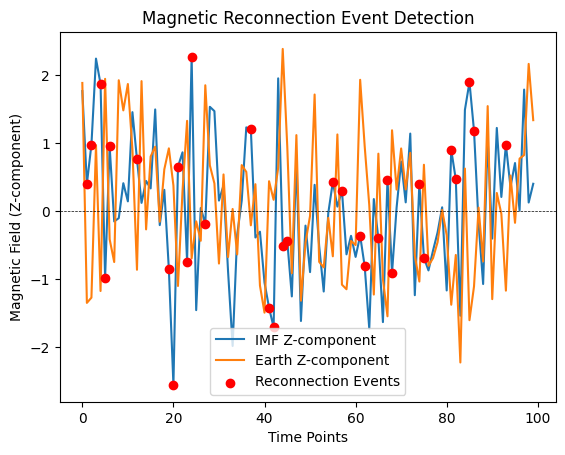

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)  # For reproducibility
time_points = np.arange(0, 100, 1)  # Representing 100 time points
imf_z = np.random.normal(0, 1, 100)  # Simulating the Z component of IMF
earth_z = np.random.normal(0, 1, 100)  # Simulating the Z component of Earth's magnetic field

# Event Detection Function
def detect_magnetic_reconnection(imf_z, earth_z, threshold=0.5):
    # Placeholder for detected events
    events = []

    # Loop through the data points and detect reconnection events
    for i, (z_imf, z_earth) in enumerate(zip(imf_z, earth_z)):
        # Condition for magnetic reconnection
        if z_imf * z_earth < -threshold**2:
            events.append(i)

    return events

# Detect magnetic reconnection events
events = detect_magnetic_reconnection(imf_z, earth_z)

# Visualization
plt.plot(time_points, imf_z, label='IMF Z-component')
plt.plot(time_points, earth_z, label='Earth Z-component')
plt.scatter(events, [imf_z[i] for i in events], color='red', zorder=5, label='Reconnection Events')
plt.title('Magnetic Reconnection Event Detection')
plt.xlabel('Time Points')
plt.ylabel('Magnetic Field (Z-component)')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


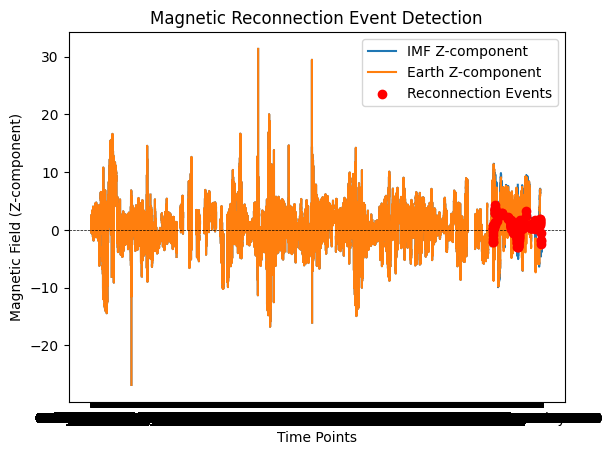

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# Assume the CSV file has columns: time, imf_z, earth_z
# Example:
# time,imf_z,earth_z
# 0,0.5,0.6
# 1,-0.3,0.4
# 2,0.7,-0.7
# ...

data = pd.read_csv('solar_wind.csv')

# Extract relevant columns
time_points = data['timedelta']
imf_z = data['bz_gsm']
earth_z = data['bz_gse']

# Event Detection Function
def detect_magnetic_reconnection(imf_z, earth_z, threshold=0.5):
    # Placeholder for detected events
    events = []

    # Loop through the data points and detect reconnection events
    for i, (z_imf, z_earth) in enumerate(zip(imf_z, earth_z)):
        # Condition for magnetic reconnection
        if z_imf * z_earth < -threshold**2:
            events.append(i)

    return events

# Detect magnetic reconnection events
events = detect_magnetic_reconnection(imf_z, earth_z)

# Visualization
plt.plot(time_points, imf_z, label='IMF Z-component')
plt.plot(time_points, earth_z, label='Earth Z-component')
plt.scatter([time_points[i] for i in events], [imf_z[i] for i in events], color='red', zorder=5, label='Reconnection Events')
plt.title('Magnetic Reconnection Event Detection')
plt.xlabel('Time Points')
plt.ylabel('Magnetic Field (Z-component)')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
